<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_jun/blob/main/04pln/clase_29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 📘 Visualizar textos en TensorFlow Projector: Paso a Paso en Google Colab

Este tutorial explica cómo transformar textos (por ejemplo, artículos constitucionales) en vectores para ser visualizados en [https://projector.tensorflow.org](https://projector.tensorflow.org).

---

## 🔹 Paso 1: Cargar tus textos

Simulamos una lista de artículos constitucionales:

```python
textos = [
    "Artículo 1: Chile es una república democrática, fundada en la soberanía popular.",
    "Artículo 2: La soberanía reside en el pueblo de Chile.",
    "Artículo 3: El Estado se organiza en tres poderes independientes.",
    "Artículo 4: La Constitución garantiza la igualdad ante la ley.",
    "Artículo 5: El medio ambiente debe ser protegido por el Estado.",
]
```

---

## 🔹 Paso 2: Instalar librerías necesarias

Usamos `sentence-transformers` para generar buenos embeddings multilingües:

```python
!pip install -q sentence-transformers
```

---

## 🔹 Paso 3: Convertir los textos a vectores (embeddings)

```python
from sentence_transformers import SentenceTransformer
import pandas as pd

# Cargar modelo multilingüe
modelo = SentenceTransformer('distiluse-base-multilingual-cased')

# Crear los vectores
vectores = modelo.encode(textos)

# Guardamos los textos como etiquetas para visualización
etiquetas = textos
```

---

## 🔹 Paso 4: Guardar archivos `.tsv`

```python
# Guardar los vectores en vectors.tsv
pd.DataFrame(vectores).to_csv("vectors.tsv", sep="\t", header=False, index=False)

# Guardar los textos originales como metadatos
pd.DataFrame(etiquetas).to_csv("metadata.tsv", sep="\t", header=False, index=False)
```

---

## 🔹 Paso 5: Descargar los archivos a tu computador

Puedes usar el explorador de archivos lateral en Colab o ejecutar:

```python
from google.colab import files
files.download("vectors.tsv")
files.download("metadata.tsv")
```

---

## 🔹 Paso 6: Cargar en TensorFlow Projector

1. Ir a: [https://projector.tensorflow.org/](https://projector.tensorflow.org/)
2. Hacer clic en “**Load**”
3. Subir:
   - `vectors.tsv` como **Tensor**
   - `metadata.tsv` como **Metadata**
4. Explorar con **PCA, t-SNE o UMAP**, y buscar similitudes entre textos.

---

## ✅ Opcional: Leer textos desde archivo `.txt` o `.csv`

Si tienes los artículos en un archivo `constitucion.txt` (una línea por artículo), haz:

```python
# Subir archivo
from google.colab import files
uploaded = files.upload()

# Leer textos desde el archivo
with open("constitucion.txt", encoding="utf-8") as f:
    textos = [line.strip() for line in f if line.strip()]
```

---

## 🎉 ¡Listo!
Ahora puedes explorar tus textos en un espacio semántico con TensorFlow Projector.


In [ ]:
# Carga de textos de gabriela mistral
# desde https://chilecultura.gob.cl/cultural-sections/396/

In [1]:
import os
import shutil

# Crear la carpeta 'corpus' si no existe
os.makedirs("corpus", exist_ok=True)

# Mover archivos PDF y EPUB cargados al entorno a la carpeta 'corpus'
for file in os.listdir():
    if file.endswith(".pdf") or file.endswith(".epub"):
        print(f"Moviendo {file} a carpeta corpus")
        shutil.move(file, os.path.join("corpus", file))

# Confirmar contenido de la carpeta
print("\nArchivos en la carpeta 'corpus':")
print(os.listdir("corpus"))



Archivos en la carpeta 'corpus':
[]


In [2]:
from google.colab import files

# Subir archivos .pdf y .epub desde tu equipo
uploaded = files.upload()

Saving gm_tomo1.epub to gm_tomo1.epub
Saving gm_tomo2.epub to gm_tomo2.epub
Saving tomo3_e.epub to tomo3_e.epub
Saving tomo4_gm.epub to tomo4_gm.epub
Saving tomo5_gm(2).epub to tomo5_gm(2).epub
Saving tomo6_m-1.pdf to tomo6_m-1.pdf
Saving tomo7_m.pdf to tomo7_m.pdf
Saving tomo8_m.pdf to tomo8_m.pdf


In [3]:
!pip install ebooklib PyMuPDF


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 48.4 MB/s eta 0:00:00


In [4]:
import os
import shutil

# Crear carpeta corpus si no existe
os.makedirs("corpus", exist_ok=True)

# Mover todos los archivos .pdf y .epub que estén en la raíz a la carpeta corpus
for archivo in os.listdir():
    if archivo.endswith(".pdf") or archivo.endswith(".epub"):
        if not archivo.startswith("corpus"):  # Evitar mover de nuevo si ya están ahí
            print(f"Moviendo {archivo} a carpeta corpus/")
            shutil.move(archivo, os.path.join("corpus", archivo))

# Verificación
print("\nContenido de la carpeta corpus:")
print(os.listdir("corpus"))


Moviendo gm_tomo1.epub a carpeta corpus/
Moviendo tomo7_m.pdf a carpeta corpus/
Moviendo tomo8_m.pdf a carpeta corpus/
Moviendo tomo6_m-1.pdf a carpeta corpus/
Moviendo tomo4_gm.epub a carpeta corpus/
Moviendo tomo3_e.epub a carpeta corpus/
Moviendo tomo5_gm(2).epub a carpeta corpus/
Moviendo gm_tomo2.epub a carpeta corpus/

Contenido de la carpeta corpus:
['gm_tomo1.epub', 'tomo7_m.pdf', 'tomo8_m.pdf', 'tomo6_m-1.pdf', 'tomo4_gm.epub', 'tomo3_e.epub', 'tomo5_gm(2).epub', 'gm_tomo2.epub']


In [5]:
# 1. Librerías necesarias
import os
import fitz  # PyMuPDF
from ebooklib import epub, ITEM_DOCUMENT
from bs4 import BeautifulSoup

def extract_epub_text(path):
    book = epub.read_epub(path)
    text = ''
    for item in book.get_items():
        if item.get_type() == ITEM_DOCUMENT:
            soup = BeautifulSoup(item.get_content(), 'html.parser')
            text += soup.get_text()
    return text


# 3. Función para PDF
def extract_pdf_text(path):
    text = ''
    with fitz.open(path) as doc:
        for page in doc:
            text += page.get_text()
    return text

# 4. Extraer textos
corpus_path = "corpus"
textos_completos = ""

for archivo in os.listdir(corpus_path):
    ruta = os.path.join(corpus_path, archivo)
    if archivo.endswith(".epub"):
        print(f"Extrayendo EPUB: {archivo}")
        textos_completos += extract_epub_text(ruta) + "\n"
    elif archivo.endswith(".pdf"):
        print(f"Extrayendo PDF: {archivo}")
        textos_completos += extract_pdf_text(ruta) + "\n"

print("\nLongitud total del corpus:", len(textos_completos), "caracteres")

# 5. Guardar en archivo
with open("gabriela_mistral_corpus.txt", "w", encoding="utf-8") as f:
    f.write(textos_completos)


Extrayendo EPUB: gm_tomo1.epub
Extrayendo PDF: tomo7_m.pdf
Extrayendo PDF: tomo8_m.pdf
Extrayendo PDF: tomo6_m-1.pdf
Extrayendo EPUB: tomo4_gm.epub
Extrayendo EPUB: tomo3_e.epub
Extrayendo EPUB: tomo5_gm(2).epub
Extrayendo EPUB: gm_tomo2.epub

Longitud total del corpus: 4647275 caracteres


In [6]:
# Cargar corpus
with open("gabriela_mistral_corpus.txt", "r", encoding="utf-8") as f:
    corpus = f.read()

# Limpiar y tokenizar
import re
tokens = re.findall(r'\b\w+\b', corpus.lower())  # palabras minúsculas sin signos
print(f"Número de tokens: {len(tokens)}")


Número de tokens: 840658


In [7]:
!pip install -q sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.2 MB/s eta 0:00:00


In [9]:
# Guardar los vectores en vectors.tsv
pd.DataFrame(vectores).to_csv("vectors.tsv", sep="\t", header=False, index=False)

# Guardar los textos originales como metadatos
pd.DataFrame(etiquetas).to_csv("metadata.tsv", sep="\t", header=False, index=False)

ValueError: DataFrame constructor not properly called!

In [12]:
print(type(etiquetas))

<class 'str'>


In [ ]:
print(etiquetas)

In [15]:
# Supongamos que etiquetas es un solo string largo
with open("gabriela_mistral_corpus.txt", encoding="utf-8") as f:
    texto_largo = f.read()

# O si ya lo tienes cargado:
# texto_largo = etiquetas

# Dividir por líneas con contenido
etiquetas = [line.strip() for line in texto_largo.splitlines() if line.strip()]


In [19]:
from sentence_transformers import SentenceTransformer
import pandas as pd

# Cargar modelo multilingüe
modelo = SentenceTransformer('distiluse-base-multilingual-cased')

# Crear los vectores
vectores = modelo.encode(corpus)

# Guardamos los textos como etiquetas para visualización
etiquetas = corpus

In [21]:
print(len(etiquetas))
print(etiquetas[:5])


4647275








In [20]:
pd.DataFrame({'text': etiquetas}).to_csv("metadata.tsv", sep="\t", header=False, index=False)
pd.DataFrame({'text': etiquetas}).to_csv("vectors.tsv", sep="\t", header=False, index=False)


ValueError: If using all scalar values, you must pass an index

In [18]:
from google.colab import files
files.download("vectors.tsv")
files.download("metadata.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 1. Desinstalar la versión actual
!pip uninstall -y numpy

# 2. Instalar versión específica
!pip install numpy==1.26.4

# 3. Reiniciar el entorno (REQUIRED)
import os
os.kill(os.getpid(), 9)  # Esto reinicia el entorno de ejecución

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 114.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [1]:
# ============================================
# Paso 1: Instalación de librerías necesarias
# ============================================
!pip install gensim matplotlib nltk --quiet

# ============================================
# Paso 2: Importar librerías
# ============================================
import gensim
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re

nltk.download('punkt')
nltk.download('stopwords')

# ============================================
# Paso 3: Cargar el archivo
# ============================================
from google.colab import files
uploaded = files.upload()

# Asumiendo que el archivo se llama 'gabriela_mistral_corpus.txt'
with open("gabriela_mistral_corpus.txt", "r", encoding="utf-8") as f:
    text = f.read()

print("Primeros 500 caracteres del texto:\n")
print(text[:500])

# ============================================
# Paso 4: Limpieza y tokenización
# ============================================
# Convertir a minúsculas
text = text.lower()

# Eliminar caracteres no alfabéticos
text = re.sub(r'[^a-záéíóúüñ\s]', '', text)

# Tokenizar
tokens = word_tokenize(text, language="spanish")

# Eliminar stopwords en español
stop_words = set(stopwords.words('spanish'))
tokens = [t for t in tokens if t not in stop_words and len(t) > 2]

print("Ejemplo de tokens limpios:")
print(tokens[:30])

# ============================================
# Paso 5: Análisis de frecuencia de palabras
# ============================================
from collections import Counter

word_freq = Counter(tokens)
most_common_words = word_freq.most_common(20)

# Mostrar palabras más comunes
print("\nPalabras más frecuentes:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

# Graficar
plt.figure(figsize=(10,5))
plt.bar([w for w, _ in most_common_words], [f for _, f in most_common_words])
plt.xticks(rotation=45)
plt.title("Palabras más frecuentes")
plt.show()

# ============================================
# Paso 6: Entrenar modelo Word2Vec
# ============================================
# Gensim espera listas de oraciones (listas de tokens)
sentences = [tokens]  # en este caso todo el corpus como una lista

# Entrenar el modelo
model = Word2Vec(
    sentences,
    vector_size=100,
    window=5,
    min_count=2,
    workers=4
)

# ============================================
# Paso 7: Consultar el modelo
# ============================================
# Palabras más similares a "amor"
print("\nPalabras más similares a 'amor':")
print(model.wv.most_similar("amor", topn=10))

# ============================================
# Paso 8: Guardar el modelo
# ============================================
model.save("gabriela_mistral_word2vec.model")
print("Modelo guardado como gabriela_mistral_word2vec.model")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Saving gabriela_mistral_corpus.txt to gabriela_mistral_corpus (1).txt
Primeros 500 caracteres del texto:





















































































































































































































OBRA REUNIDA DE GABRIELA MISTRAL
© Ediciones Biblioteca Nacional, 2019
Primera edición: diciembre de 2019
Registro de propiedad intelectual: Nº 310897
ISBN Obra Reunida: 978-956-244-469-9
ISBN Tomo I: 978-956-244-470-5
Ministra de las Culturas, las Artes y el Patrimonio
Consuelo Valdés C


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/spanish/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [2]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Primeros 500 caracteres del texto:





















































































































































































































OBRA REUNIDA DE GABRIELA MISTRAL
© Ediciones Biblioteca Nacional, 2019
Primera edición: diciembre de 2019
Registro de propiedad intelectual: Nº 310897
ISBN Obra Reunida: 978-956-244-469-9
ISBN Tomo I: 978-956-244-470-5
Ministra de las Culturas, las Artes y el Patrimonio
Consuelo Valdés C
Ejemplo de tokens limpios:
['obra', 'reunida', 'gabriela', 'mistral', 'ediciones', 'biblioteca', 'nacional', 'primera', 'edición', 'diciembre', 'registro', 'propiedad', 'intelectual', 'isbn', 'obra', 'reunida', 'isbn', 'tomo', 'ministra', 'culturas', 'artes', 'patrimonio', 'consuelo', 'valdés', 'chadwick', 'subsecretario', 'culturas', 'artes', 'juan', 'carlos']

Palabras más frecuentes:
gabriela: 1389
mistral: 1354
tierra: 1260
solo: 1175
dos: 1173
tan: 1095


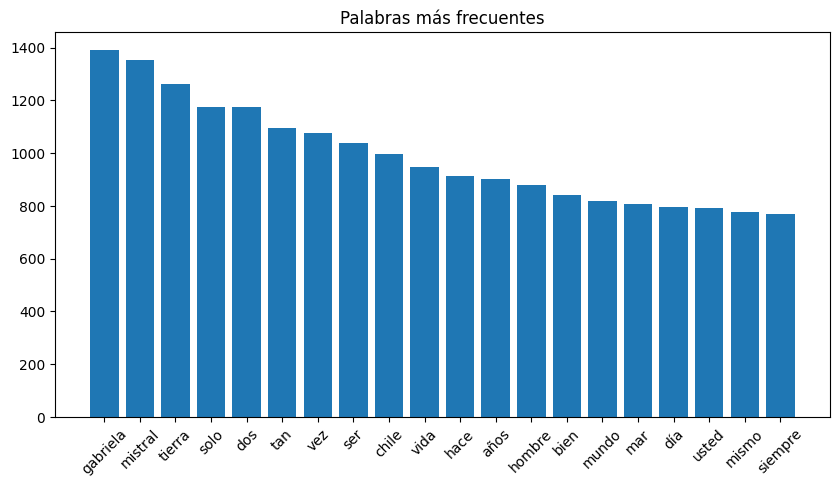


Palabras más similares a 'amor':
[('arce', 0.3831644654273987), ('héroe', 0.3765523135662079), ('gusto', 0.3603735864162445), ('calumnia', 0.3583349585533142), ('amarme', 0.35765954852104187), ('recorrió', 0.35703471302986145), ('géiseres', 0.35367509722709656), ('bombal', 0.3509199023246765), ('asunción', 0.35078513622283936), ('teóloga', 0.3412432372570038)]
Modelo guardado como gabriela_mistral_word2vec.model


In [3]:
# Asumiendo que el archivo se llama 'gabriela_mistral_corpus.txt'
with open("gabriela_mistral_corpus.txt", "r", encoding="utf-8") as f:
    text = f.read()

print("Primeros 500 caracteres del texto:\n")
print(text[:500])

# ============================================
# Paso 4: Limpieza y tokenización
# ============================================
# Convertir a minúsculas
text = text.lower()

# Eliminar caracteres no alfabéticos
text = re.sub(r'[^a-záéíóúüñ\s]', '', text)

# Tokenizar
tokens = word_tokenize(text, language="spanish")

# Eliminar stopwords en español
stop_words = set(stopwords.words('spanish'))
tokens = [t for t in tokens if t not in stop_words and len(t) > 2]

print("Ejemplo de tokens limpios:")
print(tokens[:30])

# ============================================
# Paso 5: Análisis de frecuencia de palabras
# ============================================
from collections import Counter

word_freq = Counter(tokens)
most_common_words = word_freq.most_common(20)

# Mostrar palabras más comunes
print("\nPalabras más frecuentes:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

# Graficar
plt.figure(figsize=(10,5))
plt.bar([w for w, _ in most_common_words], [f for _, f in most_common_words])
plt.xticks(rotation=45)
plt.title("Palabras más frecuentes")
plt.show()

# ============================================
# Paso 6: Entrenar modelo Word2Vec
# ============================================
# Gensim espera listas de oraciones (listas de tokens)
sentences = [tokens]  # en este caso todo el corpus como una lista

# Entrenar el modelo
model = Word2Vec(
    sentences,
    vector_size=100,
    window=5,
    min_count=2,
    workers=4
)

# ============================================
# Paso 7: Consultar el modelo
# ============================================
# Palabras más similares a "amor"
print("\nPalabras más similares a 'amor':")
print(model.wv.most_similar("amor", topn=10))

# ============================================
# Paso 8: Guardar el modelo
# ============================================
model.save("gabriela_mistral_word2vec.model")
print("Modelo guardado como gabriela_mistral_word2vec.model")


In [4]:
# ============================================
# Exportar modelo Word2Vec para TensorFlow Projector
# ============================================

import numpy as np

# Ruta de salida
VECTOR_FILE = "vectors.tsv"
METADATA_FILE = "metadata.tsv"

# Abrir archivos para escritura
with open(VECTOR_FILE, 'w', encoding='utf-8') as v_out, open(METADATA_FILE, 'w', encoding='utf-8') as m_out:
    for word in model.wv.index_to_key:  # Palabras en orden del vocabulario
        # Escribir palabra en metadata
        m_out.write(f"{word}\n")

        # Obtener vector y escribirlo separado por tabs
        vector = model.wv[word]
        v_out.write('\t'.join([str(x) for x in vector]) + "\n")

print(f"Archivos creados: {VECTOR_FILE} y {METADATA_FILE}")


Archivos creados: vectors.tsv y metadata.tsv
